# CMB Shape Analysis

This notebook enriches CMB metadata with shape and intensity features computed with radiomics

In [32]:
import os
import sys
import argparse
import traceback


import logging
import numpy as np
import  ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
all_meta_path = "../../data-misc/csv/CMB_metadata_all.csv"
csv_metadata_radiomics = "../../data-misc/csv/CMB_radiomics_metadata.csv"

In [34]:
df_cmb_metadata = pd.read_csv(all_meta_path)
df_cmb_metadata_radiomics = pd.read_csv(csv_metadata_radiomics)
df_cmb_metadata_radiomics['CM'] = df_cmb_metadata_radiomics['CM'].apply(lambda x: list(ast.literal_eval(x)))
df_cmb_metadata_radiomics['CM'] = df_cmb_metadata_radiomics['CM'].astype(str)
df_cmb_metadata['CM'] = df_cmb_metadata['CM'].astype(str)
df_cmb_metadata_radiomics.head(2)

/tmp/ipykernel_4081300/2459987675.py:1: DtypeWarning: Columns (7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cmb_metadata = pd.read_csv(all_meta_path)


,seriesUID,CM,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,glszm_ZoneEntropy,glszm_ZonePercentage,glszm_ZoneVariance,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength,count_dict,com_label
0,DOU-12-CMB-1,"[211, 56, 113]",0.870108,0.760207,4.293616,5.647957,6.708204,6.324555,6.708204,6.782330,...,-3.203427e-16,0.012821,0.00,0.000000,1000000.000000,0.000000,0.00000,0.000000,"{0.0: 31724742, 24.0: 16, 42.0: 62}",42.0
1,CRB-1.2.826.1.3680043.9.5282.150415.650.650232...,"[35, 131, 121]",0.538617,0.505715,6.981429,13.805066,14.317821,9.000000,13.892444,14.456832,...,3.000000e+00,0.016667,2994.25,2.202657,0.025222,5.518919,0.03698,0.280242,"{0.0: 26007936, 3.0: 230, 24.0: 250}",24.0


In [35]:
df_radiomics = df_cmb_metadata_radiomics
df_radiomics = df_cmb_metadata.merge(df_cmb_metadata_radiomics, on=['seriesUID', 'CM'], how='inner')
df_radiomics.head(2)

,seriesUID,cmb_id,CM,size,radius,processed_id,RB_label,Location,Multiple,<5mm,...,glszm_ZoneEntropy,glszm_ZonePercentage,glszm_ZoneVariance,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength,count_dict,com_label
0,DOU-15-CMB-13,0,"[87, 207, 191]",121,3.07,NaN,NaN,NaN,NaN,NaN,...,-3.203427e-16,0.008264,0.0,0.0,1000000.0,0.0,0.0,0.0,"{0.0: 44879063, 12.0: 101, 13.0: 20}",12.0
1,DOU-15-CMB-13,1,"[132, 211, 185]",146,3.27,NaN,NaN,NaN,NaN,NaN,...,-3.203427e-16,0.006849,0.0,0.0,1000000.0,0.0,0.0,0.0,"{0.0: 44879038, 10.0: 146}",10.0


In [36]:
df_radiomics.groupby('Dataset').size()

Dataset
CRB    127
DOU     74
dtype: int64

# Plots

In [39]:
for col in df_radiomics.columns:
    print(col)

seriesUID
cmb_id
CM
size
radius
processed_id
RB_label
Location
Multiple
<5mm
Cause
Uncertain
Other
seq_type
res_level
field_strength
TE
subject
patientUID
Dataset
shape_Elongation
shape_Flatness
shape_LeastAxisLength
shape_MajorAxisLength
shape_Maximum2DDiameterColumn
shape_Maximum2DDiameterRow
shape_Maximum2DDiameterSlice
shape_Maximum3DDiameter
shape_MeshVolume
shape_MinorAxisLength
shape_Sphericity
shape_SurfaceArea
shape_SurfaceVolumeRatio
shape_VoxelVolume
firstorder_10Percentile
firstorder_90Percentile
firstorder_Energy
firstorder_Entropy
firstorder_InterquartileRange
firstorder_Kurtosis
firstorder_Maximum
firstorder_MeanAbsoluteDeviation
firstorder_Mean
firstorder_Median
firstorder_Minimum
firstorder_Range
firstorder_RobustMeanAbsoluteDeviation
firstorder_RootMeanSquared
firstorder_Skewness
firstorder_TotalEnergy
firstorder_Uniformity
firstorder_Variance
glcm_Autocorrelation
glcm_ClusterProminence
glcm_ClusterShade
glcm_ClusterTendency
glcm_Contrast
glcm_Correlation
glcm_Differe

/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

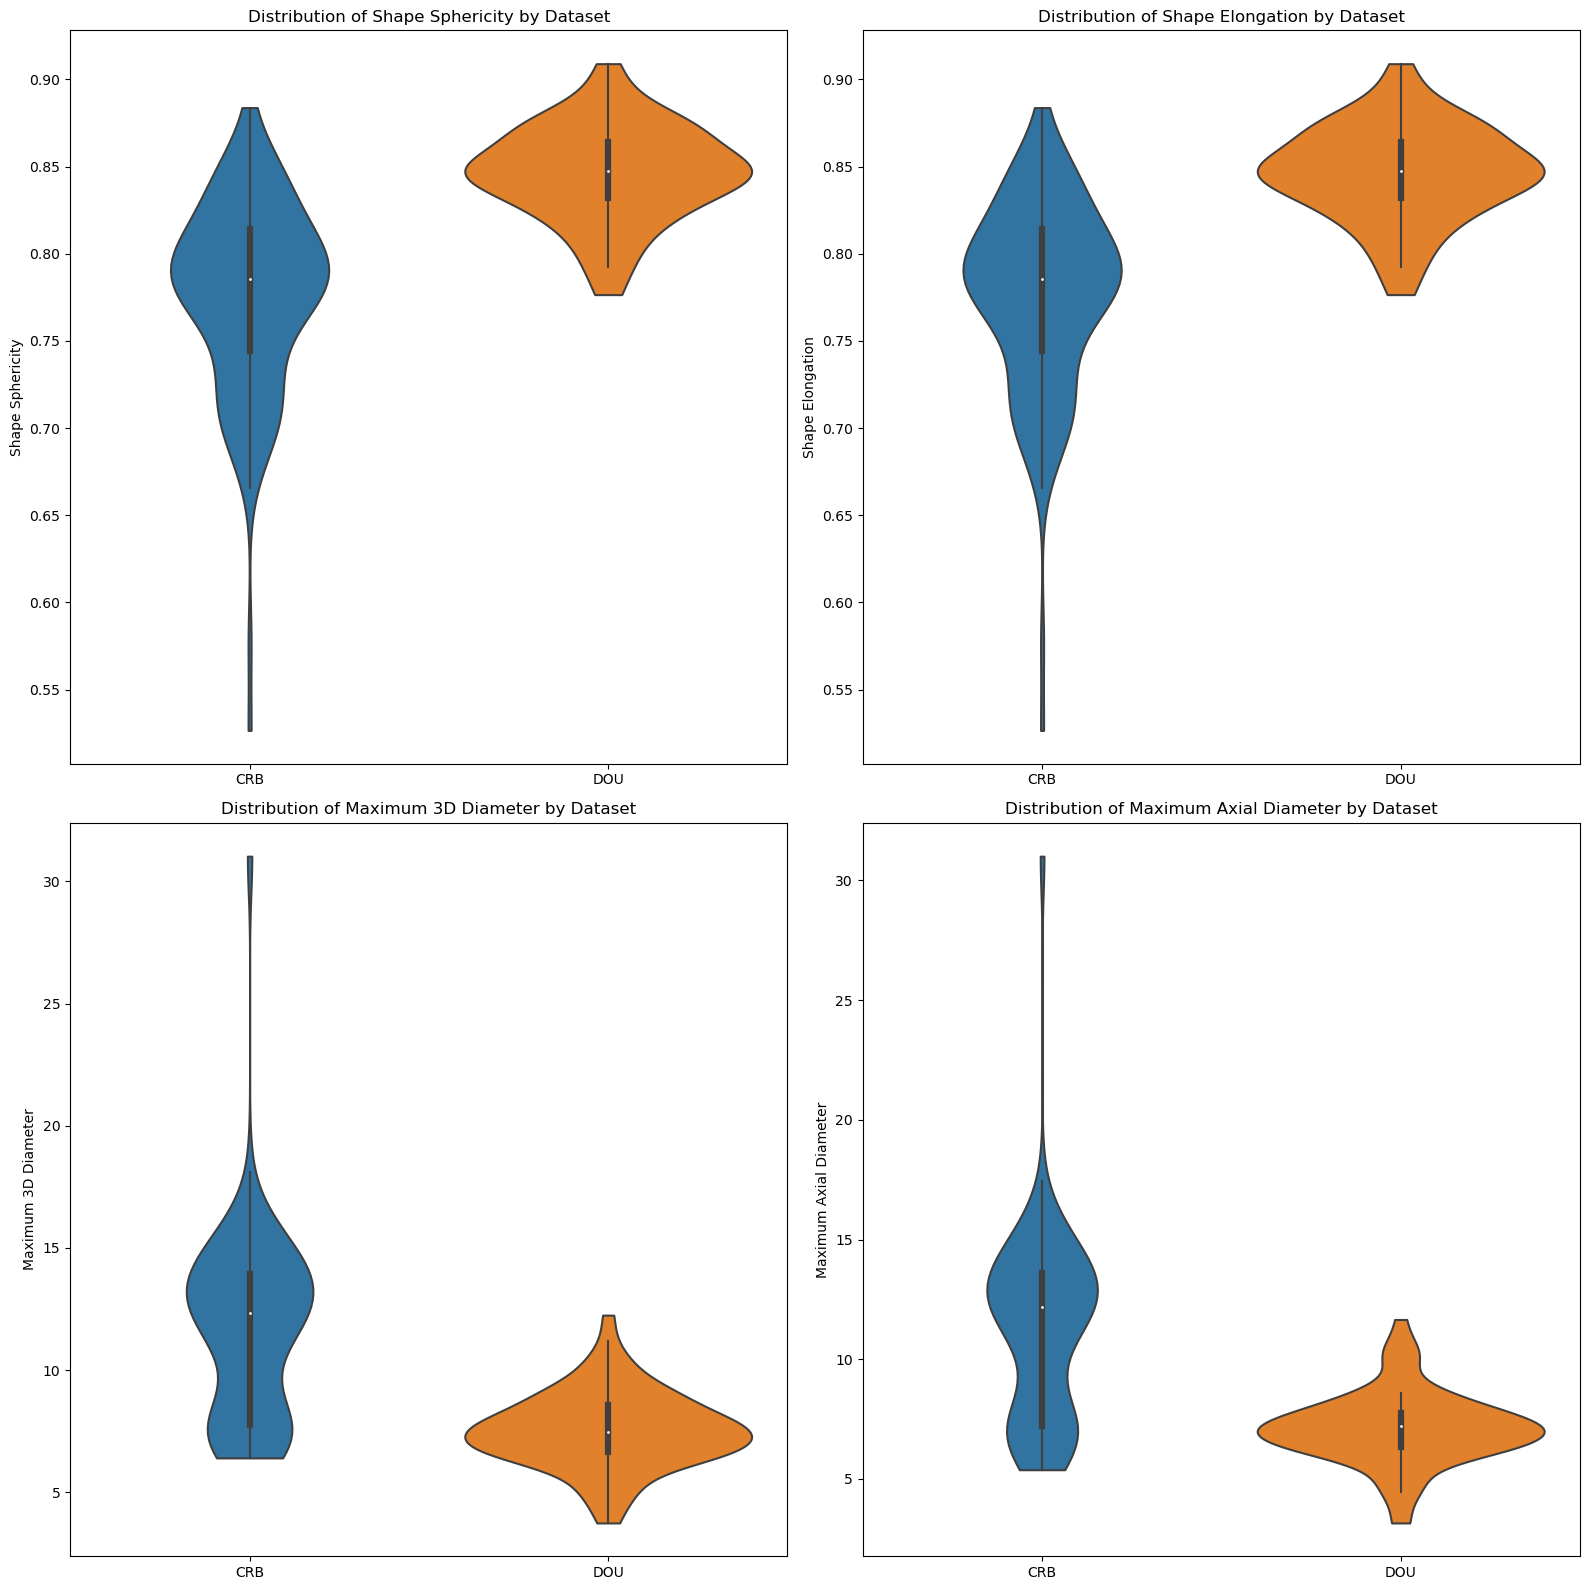

In [40]:
def create_violin_plot(ax, data, column, group_by, title, xlabel, ylabel):
    """
    Creates a violin plot on the specified axes object.
    """
    sns.violinplot(x=group_by, y=column, data=data, ax=ax, cut=0)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Assuming df_radiomics is your DataFrame containing the radiomics features and dataset information
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

# Plotting Sphericity
create_violin_plot(
    ax=axs[0, 0],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Sphericity',
    group_by='Dataset',
    title='Distribution of Shape Sphericity by Dataset',
    xlabel='',
    ylabel='Shape Sphericity'
)

# Plotting Elongation
create_violin_plot(
    ax=axs[0, 1],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Sphericity',
    group_by='Dataset',
    title='Distribution of Shape Elongation by Dataset',
    xlabel='',
    ylabel='Shape Elongation'
)

# Plotting Maximum 3D Diameter
create_violin_plot(
    ax=axs[1, 0],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum3DDiameter',
    group_by='Dataset',
    title='Distribution of Maximum 3D Diameter by Dataset',
    xlabel='',
    ylabel='Maximum 3D Diameter'
)

# Plotting Maximum 2D Diameter Slice
create_violin_plot(
    ax=axs[1, 1],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum2DDiameterSlice',
    group_by='Dataset',
    title='Distribution of Maximum Axial Diameter by Dataset',
    xlabel='',
    ylabel='Maximum Axial Diameter'
)

# Adjust layout and display plot
plt.tight_layout()
plt.savefig("../../data-misc/img/radiomics_features_by_dataset.png")
plt.show()